# 图片识别、目标检测、风格迁移

## 图片识别

卷积解决的问题：传统神经网络输入维度太大，导致网络结构太复杂，数据量相对不够，则出现
过拟合，以及计算量太大。

每一张图片都是由3层（RGB）n*m个像素点合成的，我们的操作是针对于像素点来完成的。
像素点的取值为【0，255】，由黑至白。

图片的边缘检测：分为垂直边缘检测及水平边缘检测，通过与相应滤波器进行卷积来实现。python中，卷积用conv_forward()表示；tensorflow中，卷积用tf.nn.conv2d()表示；keras中，卷积用Conv2D()表示。

垂直边缘检测和水平边缘检测的滤波器算子：

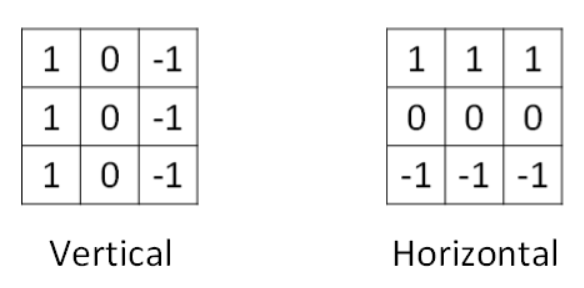

In [7]:
from IPython.display import Image
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"
Image(filename = libo + "1548285580(1).jpg", width=500, height=100)

滤波器有很多种，都是九个数字组成。CNN的目的就是算出滤波器中的每一个值。

padding解决的问题：1.卷积运算后，输出图片变小。2.原始图片边缘信息输出贡献少。
padding：在原始图片周围填充0像素点，用p来表示每个方向扩展的宽度。
滤波器尺寸为f*f,原始图片为n*n,进过padding后，变为(n+2p)*(n+2p).
若要卷积前后图片大小不变，则要求：         
n+2p-f+1=n 推出 p=（f−1）/2

Stride：表示filter在原图中水平方向和垂直方向每次的步进长度。
⌊⋯⌋表示向下取整

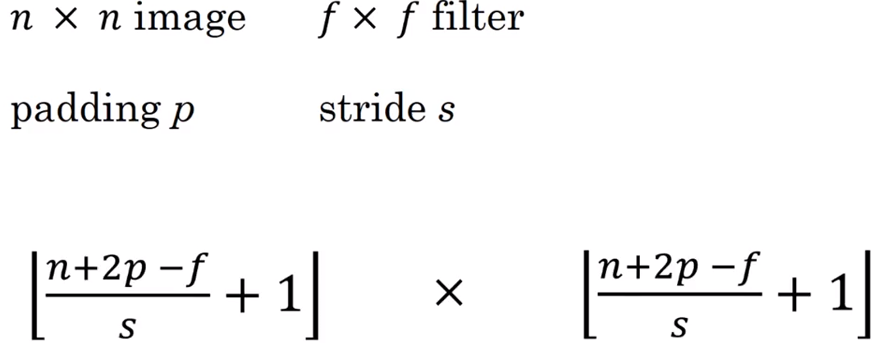

In [8]:
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"
Image(filename = libo + "1548317737(1).jpg", width=500, height=100)

相关系数与卷积：之前我们进行的都是相关系数的计算，真正的卷积运算（数学中）会先将filter
绕 y=x 旋转，再进行相关系数的计算。但是为简化运算，且这两种运算影响不大，所以CNN把这种
“相关系数”就称作卷积运算。

实际图片是3通道的RGB图片，其对应的滤波器算子同样也是3通道的。检测结果是二维的。
不同通道的滤波算子可以不相同，这样可以实现只检测某一通道（其他通道为0）或自定义通道权值（对不同颜色的敏感程度不同）或每一个通道实现不同的检测目标（垂直、边缘检测等）

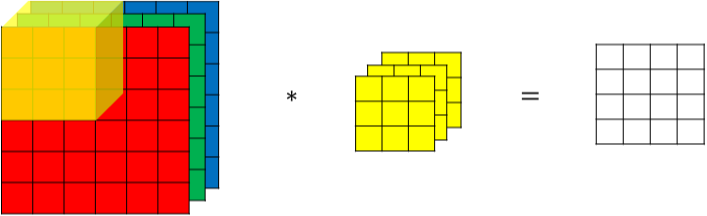

In [9]:
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"    #默认步长为1
Image(filename = libo + "20171128203853526.png", width=500, height=100)

不同滤波器实现不同目的，组在一起后卷积得到不同的输出，个数由滤波器组决定。

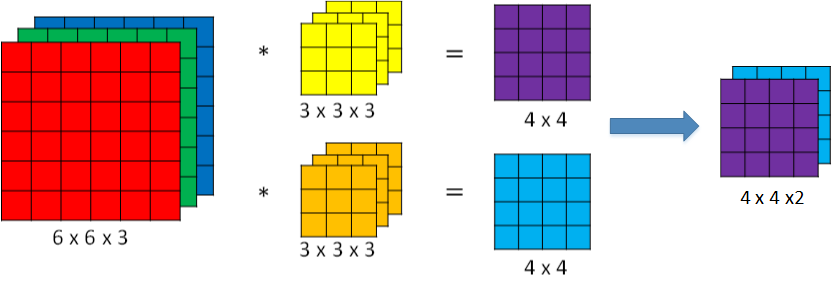

In [10]:
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"         #默认步长为1
Image(filename = libo + "20171128230704297.png", width=500, height=100)

单层神经网络：CNN的单层结构多了激活函数ReLU和偏移量b。
卷积运算对应着乘积运算，滤波器组数值对应着权重W[l]，所选的激活函数为ReLU。

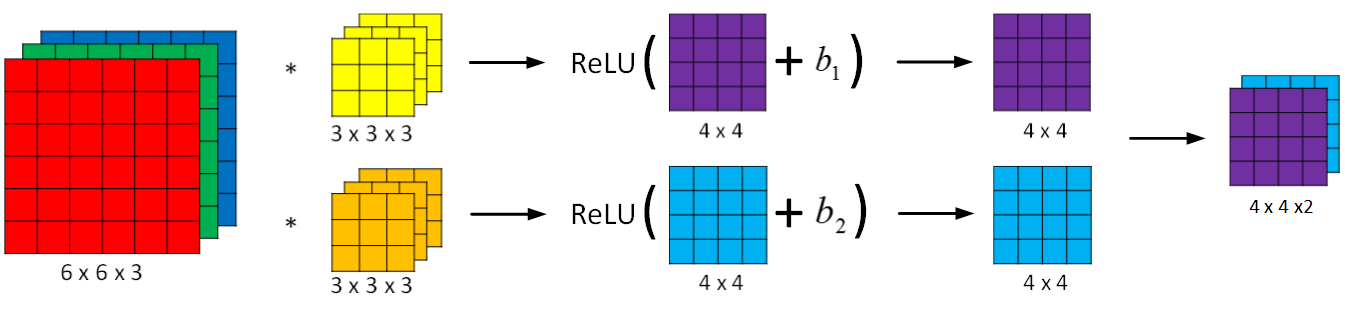

In [11]:
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"         #默认步长为1
Image(filename = libo + "20171128233242494.png", width=500, height=100)

参数数目：每个滤波器组有27个参数，还有一个偏移量b，共28个参数。
选定滤波器组后，参数数量与输入图片的尺寸无关，避免参数过多，减小计算量。

CNN单层结构的标记符号：
f[l] = filter size  
p[l] = padding  
s[l] = stride  
n[l]c = number of filters

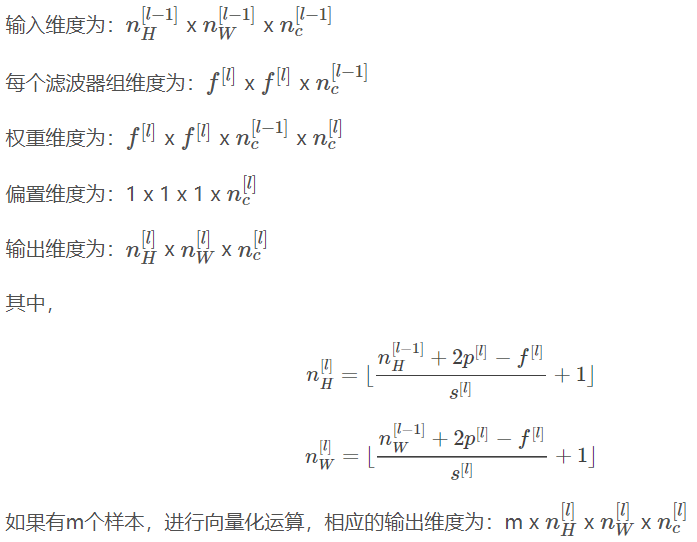

In [12]:
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"         #默认步长为1
Image(filename = libo + "微信截图_20190124195616.png", width=430, height=300)

一个简单的多层卷积：最后一层维度为1960 x 1，然后连接最后一级输出层。输出层可以是一个神经元，即二元分类（logistic）；也可以是多个神经元，即多元分类（softmax）。最后得到预测输出y^。 一般，随着层数的增加，长、宽变窄，通道加深。

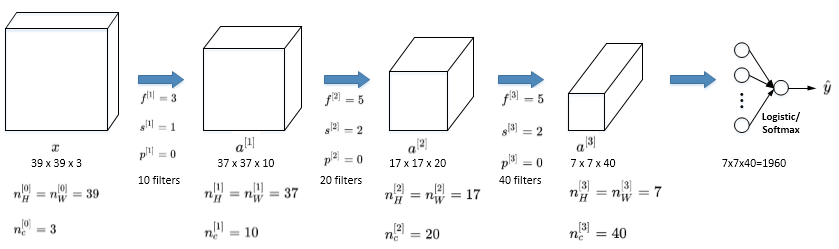

In [13]:
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"         #默认步长为1
Image(filename = libo + "2.png", width=800, height=200)

一个典型的卷积神经网络包含3层：
1.卷积层   Convolution层（CONV）
2.池化层   Pooling层（POOL）
3.全连接层  Fully connected层（FC）

池化层目的：减小图片尺寸，提高运算速度，减小噪声影响，提高特征的鲁棒性。

鲁棒性：（抗变换性、稳健性）.指方法性能，同一个算法适用于多个系统（或系统的多个状态），即系统的特征参数发生较小变化之后该方法仍能保持良好的性能。稳定性指的是系统在某个稳定状态下受到较小的扰动后仍能回到原状态或另一个稳定状态。

max pooling:最大池化，滤波器取区域中的最大值，降低了噪声影响，提高模型健壮性。
当 f=2,s=2 时，缩小一半。

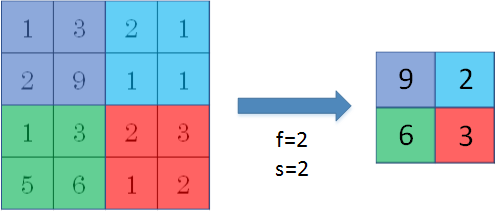

In [14]:
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"         #默认步长为1
Image(filename = libo + "3.png", width=500, height=100)

实战例子：简单的数字识别。CONV层后面紧接一个POOL层，CONV1和POOL1构成第一层，CONV2和POOL2构成第二层。特别注意的是FC3和FC4为全连接层FC，它跟标准的神经网络结构一致。最后的输出层（softmax）由10个神经元构成。

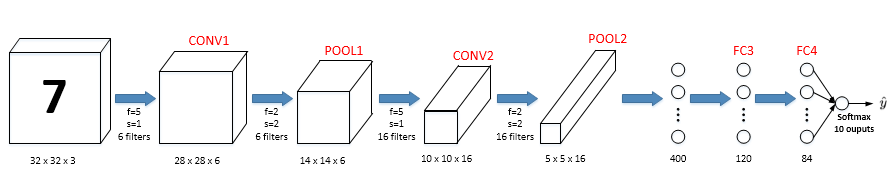

In [15]:
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"
Image(filename = libo + "4.png", width=600, height=200)

经验：图片尺寸应逐渐缩小，可以多个卷积层后再跟一个池化层，最后是全连接层。
参数多参照论文，池化层没有参数，卷积层参数较小，全连接层较多，这是通道加深的结果。

卷积的优势（对比于仅用全连接层）：参数共享、稀疏连接。
参数共享：一个特征检测器（例如垂直边缘检测）对图片某块区域有用，同时也可能作用在图片其它区域。
稀疏连接：因为滤波器算子尺寸限制，每一层的每个输出只与输入部分区域内有关。
此外，卷积参数数目较少，故所需样本较少，一定程度上避免了过拟合；卷积擅长捕捉区域位置偏移，即不太受物体所处图片位置的影响。